# Классификация дохода

### Описание задачи
Проведем анализ датасета для задачи классификации доходов. Целевая переменная: определить, превышает ли годовой доход человека 50,000 долларов на основе различных характеристик.

### Описание признаков

*   age - возраст
*   workclass - тип работодателя
*   fnlwgt -  вес записи в выборке (используется для статистической значимости)
*   education - уровень образования
*   education-num - числовое представление уровня образования
*   marital-status - семейное положение
*   occupation - род занятий
*   relationship - роль в семье
*   race - расса
*   sex - пол
*   capital-gain - доход от капитала (инвестиции, продажа активов и т.д.)
*   capital-loss - потери капитала
*   hours-per-week - количество рабочих часов в неделю
*   native-country - страна происхождения
*   income - уровень дохода


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import sklearn.model_selection
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/TriangularSquare/Machine-Learning/refs/heads/main/income_evaluation.csv"
dataset = pd.read_csv(url)

In [3]:
# Число объектов и признаков
dataset.shape

(32561, 15)

In [4]:
dataset.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Подготовка датасета

In [6]:
# Проверим повторяющиеся записи
dataset.duplicated().sum()

24

In [7]:
# Удалим повторяющиеся значения
dataset.drop_duplicates(inplace= True)

In [8]:
# Проверим пропущенные значения
dataset.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [9]:
# Проверим количество уникальных значений признаков
dataset.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

Заменим значения <=50K на 0, а >50K на 1

Удаляем пробелы в начале и конце всех названий столбцов

In [10]:
dataset.columns = dataset.columns.str.strip()

In [11]:
dataset['income'] = dataset['income'].str.strip()
dataset['income'] = dataset['income'].replace('>50K','1')
dataset['income'] = dataset['income'].replace('<=50K','0')
dataset['income'] = dataset['income'].astype('int64')

Заменим значения полей Male и Femeale в поле sex на 0 и 1 соответственно

In [12]:
dataset['sex'] = dataset['sex'].str.strip()
dataset['sex'] = dataset['sex'].replace('Male','0')
dataset['sex'] = dataset['sex'].replace('Female','1')
dataset['sex'] = dataset['sex'].astype('int64')

Объединим доход и потери капитала в один столбец

In [13]:
dataset['capital_total'] = dataset['capital-gain'] - dataset['capital-loss']
dataset=dataset.drop(['capital-gain','capital-loss'],axis=1)

Рассмотрим записи, у которых неизвестна страна происхождения

In [14]:
# Находим веса всех записей, у которых неизвестны некоторые поля
weights = dataset[
    (dataset['native-country'] == ' ?') | 
    (dataset['occupation'] == ' ?') | 
    (dataset['workclass'] == ' ?')
]['fnlwgt'].sum()

# Находим суммарный вес всех записей
total_weights = dataset['fnlwgt'].sum()

# Вычисляем отношение
ratio = weights 
ratio / total_weights

0.07363151130738377

Суммарный вес всех таких записей представляет около 7% от суммарного веса всех записей, удаляем их

In [15]:
dataset['native-country'] = dataset['native-country'].str.strip()
dataset['occupation'] = dataset['occupation'].str.strip()
dataset['workclass'] = dataset['workclass'].str.strip()

dataset = dataset[
    (dataset['native-country'] != '?') &
    (dataset['occupation'] != '?') &
    (dataset['workclass'] != '?')
]

Конечная версия датасета будет выглядеть следующим образом

In [16]:
dataset.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_total
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,Cuba,0,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,40,United-States,0,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,1,16,Jamaica,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0,45,United-States,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,1,50,United-States,1,14084
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,40,United-States,1,5178


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  int64 
 10  hours-per-week  30139 non-null  int64 
 11  native-country  30139 non-null  object
 12  income          30139 non-null  int64 
 13  capital_total   30139 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.4+ MB


In [18]:
dataset.shape

(30139, 14)

In [19]:
dataset['workclass'] = dataset['workclass'].astype('category')
dataset['education'] = dataset['education'].astype('category')
dataset['marital-status'] = dataset['marital-status'].astype('category')
dataset['occupation'] = dataset['occupation'].astype('category')
dataset['relationship'] = dataset['relationship'].astype('category')
dataset['race'] = dataset['race'].astype('category')
dataset['native-country'] = dataset['native-country'].astype('category')

### Визуализация данных, борьба с выбросами

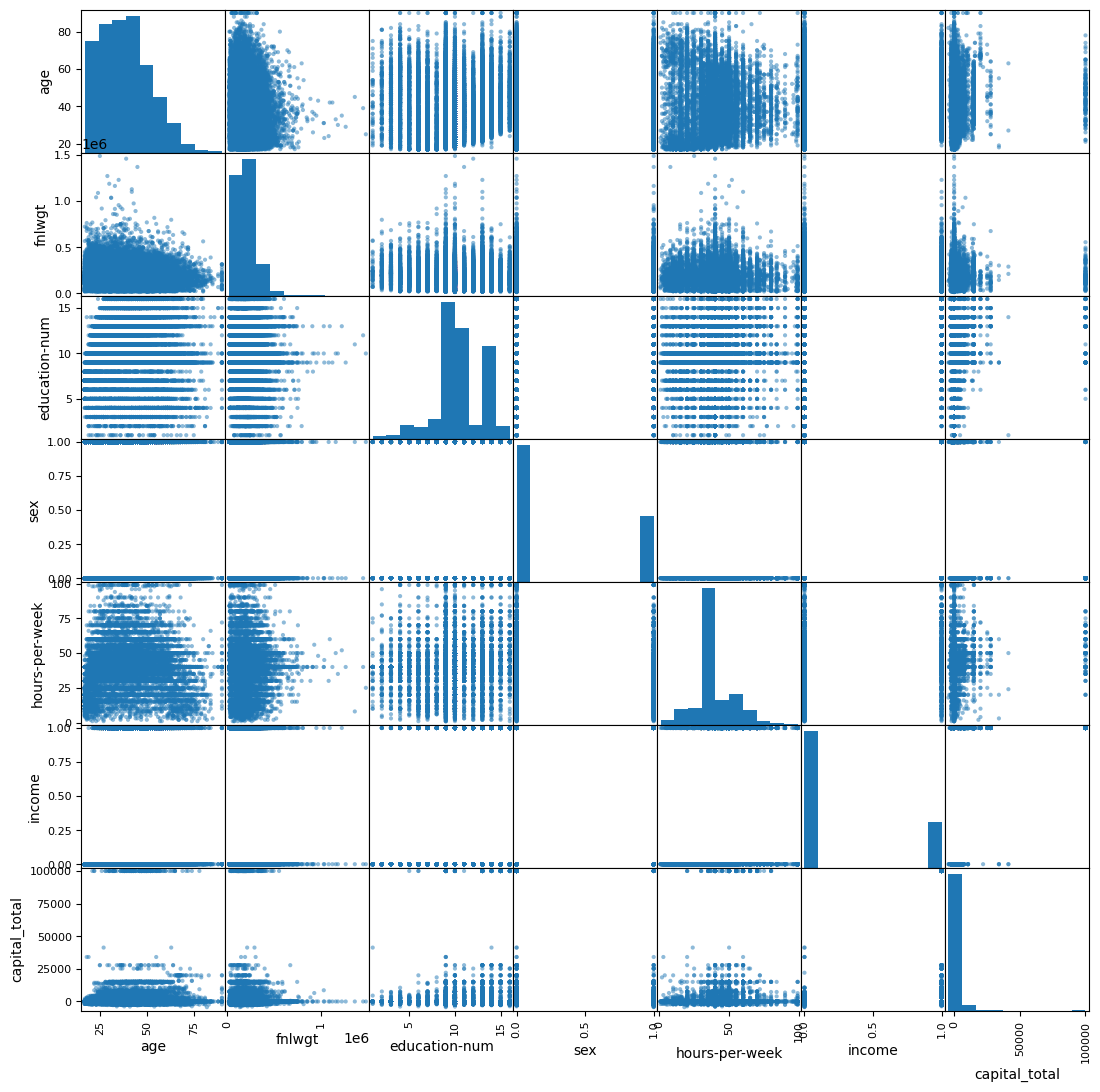

In [20]:
# Построим матрицу диаграмм рассеивания
pd.plotting.scatter_matrix(dataset, figsize = (13, 13))
pass

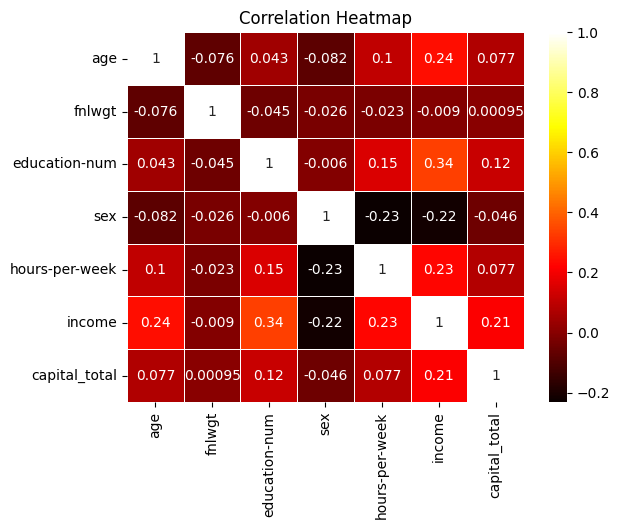

In [21]:
cor = dataset.select_dtypes(include=['int64']).corr()
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

### Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых принаков.

In [22]:
dataset = pd.get_dummies(dataset)

### Нормализация признаков

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

dataset_normalized.describe()

,age,fnlwgt,education-num,sex,hours-per-week,income,capital_total,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,...,3.013900e+04,30139.000000,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04,3.013900e+04
mean,6.223938e-17,-1.296654e-16,2.737118e-16,1.762270e-17,-2.866784e-16,4.455774e-17,3.996051e-17,-2.569732e-17,4.667954e-17,3.630631e-17,...,8.015678e-18,0.000000,1.273078e-17,-1.414531e-17,2.781912e-17,3.772084e-18,9.430210e-19,7.166959e-17,1.850679e-17,8.958699e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.632883e+00,-1.666016e+00,-3.579294e+00,-6.927253e-01,-3.333850e+00,-5.758816e-01,-7.211594e-01,-1.797191e-01,-2.713523e-01,-1.681420e+00,...,-3.360626e-02,-0.060247,-1.910782e-02,-4.859336e-02,-3.735623e-02,-2.375651e-02,-2.444565e-02,-3.219415e+00,-4.613039e-02,-2.304681e-02
25%,-7.951835e-01,-6.830367e-01,-4.404339e-01,-6.927253e-01,-7.803133e-02,-5.758816e-01,-1.351267e-01,-1.797191e-01,-2.713523e-01,-1.681420e+00,...,-3.360626e-02,-0.060247,-1.910782e-02,-4.859336e-02,-3.735623e-02,-2.375651e-02,-2.444565e-02,3.106155e-01,-4.613039e-02,-2.304681e-02
50%,-1.097934e-01,-1.076885e-01,-4.807645e-02,-6.927253e-01,-7.803133e-02,-5.758816e-01,-1.351267e-01,-1.797191e-01,-2.713523e-01,5.947353e-01,...,-3.360626e-02,-0.060247,-1.910782e-02,-4.859336e-02,-3.735623e-02,-2.375651e-02,-2.444565e-02,3.106155e-01,-4.613039e-02,-2.304681e-02
75%,6.517511e-01,4.524975e-01,1.128996e+00,1.443574e+00,3.393813e-01,-5.758816e-01,-1.351267e-01,-1.797191e-01,-2.713523e-01,5.947353e-01,...,-3.360626e-02,-0.060247,-1.910782e-02,-4.859336e-02,-3.735623e-02,-2.375651e-02,-2.444565e-02,3.106155e-01,-4.613039e-02,-2.304681e-02
max,3.926393e+00,1.225580e+01,2.306068e+00,1.443574e+00,4.847438e+00,1.736468e+00,1.331820e+01,5.564240e+00,3.685246e+00,5.947353e-01,...,2.975636e+01,16.598331,5.233459e+01,2.057894e+01,2.676930e+01,4.209373e+01,4.090708e+01,3.106155e-01,2.167768e+01,4.338995e+01


### Разбиение выборки на обучающую и тестовую

In [24]:
x = dataset_normalized.drop(['income'], axis=1)
y = dataset['income']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

В корреляционной матрице нет переменных с высокой корреляцией, ничего не убираем

### K-neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем классификатор
knn.fit(x_train, y_train)

# Прогнозируем на тестовых данных
y_pred = knn.predict(x_test)

# Оцениваем точность
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4485
           1       0.67      0.59      0.63      1543

    accuracy                           0.82      6028
   macro avg       0.77      0.75      0.76      6028
weighted avg       0.82      0.82      0.82      6028



Подберем лучшее K

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 30)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_k

29

In [27]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

# Прогнозируем на тестовых данных
y_pred = best_knn.predict(x_test)

# Оцениваем точность
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [28]:
from sklearn.metrics import mean_squared_error

# Прогнозируем значения на обучающей выборке
y_train_pred = best_knn.predict(x_train)
train_error = mean_squared_error(y_train, y_train_pred)
print(f'Ошибка на обучающей выборке: {train_error:.2f}')

# Прогнозируем значения на тестовой выборке
y_test_pred = best_knn.predict(x_test)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Ошибка на тестовой выборке: {test_error:.2f}')

Ошибка на обучающей выборке: 0.17
Ошибка на тестовой выборке: 0.17


### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Обучаем модель
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

# Прогнозируем на тестовых данных
y_pred_lr = log_reg.predict(x_test)
y_pred_proba_lr = log_reg.predict_proba(x_test)[:, 1]

# Оцениваем точность
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)

print("Логистическая регрессия:")
print(f"Accuracy: {accuracy_lr:.2f}")
print('Classification Report:')
print(classification_rep)

Логистическая регрессия:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4485
           1       0.75      0.61      0.67      1543

    accuracy                           0.85      6028
   macro avg       0.81      0.77      0.79      6028
weighted avg       0.84      0.85      0.84      6028



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

0.8540145985401459

Подберем гиперпараметры для Random Forest

In [31]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Определим диапазон значений для гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициализируем модель RandomForest
rf = RandomForestClassifier(random_state=42)

# Настроим GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Обучаем модель и подбираем лучшие гиперпараметры
grid_search.fit(x_train, y_train)

# Лучшие гиперпараметры
best_params = grid_search.best_params_
print(f'Лучшие гиперпараметры: {best_params}')

# Обучаем модель с лучшими гиперпараметрами
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

# Прогнозируем на тестовых данных
y_pred = best_rf.predict(x_test)

# Оцениваем точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy:.2f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Лучшие гиперпараметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Точность: 0.86


### Общие выводы:
* Random Forest: 86%
* Логистическая регрессия: 84%
* KNN: 83%
  Разница в 2-3% обусловлена тем, как каждая модель справляется со спецификой данных